In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.image as mpimg
import tensorflow as tf


In [2]:


training_data=[]
training_labels=[]

testing_data=[]
testing_labels=[]

DATADIR = "C:/Users/NINANMM.000/OneDrive - University of Cincinnati/Desktop/next_test"

CATEGORIES = ["subject01", "subject02","subject03", "subject04", "subject05","subject06","subject07","subject08","subject09", "subject10","subject11"]
CATEGORIES_TRAIN=["subject12", "subject13", "subject14","subject15" ]

IMG_SIZEX=280
IMG_SIZEY=280


for category in CATEGORIES:
    
    path = os.path.join(DATADIR,category)  
    class_num= CATEGORIES.index(category)
    j=0
    for img in os.listdir(path): 
        
        img_array = mpimg.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        new_array=cv2.resize(img_array,(IMG_SIZEX,IMG_SIZEY))

        training_data.append(new_array)
        training_labels.append(j)
        j+=1
        
        
training_data=np.array(training_data)
training_labels=np.array(training_labels)




for category in CATEGORIES_TRAIN:
    
    path = os.path.join(DATADIR,category)  
    class_num= CATEGORIES_TRAIN.index(category)
    j=0
    for img in os.listdir(path): 
        
        img_array = mpimg.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        new_array=cv2.resize(img_array,(IMG_SIZEX,IMG_SIZEY))

        testing_data.append(new_array)
        testing_labels.append(j)
        j+=1
        
        
testing_data=np.array(testing_data)
testing_labels=np.array(testing_labels)

In [3]:
print(len(training_labels))
print(training_data.shape)
print(testing_data.shape)

132
(132, 280, 280)
(48, 280, 280)


1
[[130 130 130 ... 255 255 255]
 [230 230 230 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 254 255 255]
 [218 218 218 ... 218 218 218]
 [ 68  68  68 ...  68  68  68]]


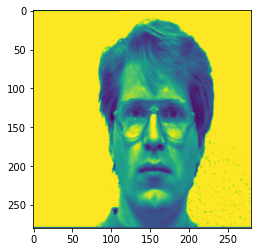

In [4]:
plt.imshow(training_data[1])
print(training_labels[1])
print(training_data[1])

In [5]:
training_data = training_data / 255.0
testing_data=testing_data/255.0

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(35,(4,4), activation=tf.nn.relu,input_shape=(280,280,1)), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(120,(2,2), activation=tf.nn.relu), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    tf.keras.layers.Dense(200, activation='softmax')
])

In [7]:
type(training_data)
training_data = training_data.reshape(-1, 280, 280, 1)


In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history=model.fit(training_data, training_labels, epochs=100)

Epoch 1/100
5/5 [==============================] - 5s 144ms/step - loss: 14.4210 - accuracy: 0.0152
Epoch 2/100
5/5 [==============================] - 0s 64ms/step - loss: 5.5382 - accuracy: 0.0530
Epoch 3/100
5/5 [==============================] - 0s 64ms/step - loss: 4.1752 - accuracy: 0.0833
Epoch 4/100
5/5 [==============================] - 0s 64ms/step - loss: 3.1905 - accuracy: 0.2121
Epoch 5/100
5/5 [==============================] - 0s 64ms/step - loss: 2.8486 - accuracy: 0.2197
Epoch 6/100
5/5 [==============================] - 0s 64ms/step - loss: 2.3391 - accuracy: 0.2045
Epoch 7/100
5/5 [==============================] - 0s 64ms/step - loss: 2.4649 - accuracy: 0.2045
Epoch 8/100
5/5 [==============================] - 0s 64ms/step - loss: 2.2995 - accuracy: 0.2424
Epoch 9/100
5/5 [==============================] - 0s 65ms/step - loss: 2.0378 - accuracy: 0.3333
Epoch 10/100
5/5 [==============================] - 0s 64ms/step - loss: 1.9482 - accuracy: 0.3106
Epoch 11/100
5/5 

5/5 [==============================] - 0s 64ms/step - loss: 0.2331 - accuracy: 0.8712
Epoch 84/100
5/5 [==============================] - 0s 65ms/step - loss: 0.2332 - accuracy: 0.8636
Epoch 85/100
5/5 [==============================] - 0s 65ms/step - loss: 0.2391 - accuracy: 0.8636
Epoch 86/100
5/5 [==============================] - 0s 63ms/step - loss: 0.2381 - accuracy: 0.8561
Epoch 87/100
5/5 [==============================] - 0s 64ms/step - loss: 0.2466 - accuracy: 0.8636
Epoch 88/100
5/5 [==============================] - 0s 64ms/step - loss: 0.2398 - accuracy: 0.8561
Epoch 89/100
5/5 [==============================] - 0s 64ms/step - loss: 0.2381 - accuracy: 0.8561
Epoch 90/100
5/5 [==============================] - 0s 64ms/step - loss: 0.2864 - accuracy: 0.8561
Epoch 91/100
5/5 [==============================] - 0s 64ms/step - loss: 0.3023 - accuracy: 0.8636
Epoch 92/100
5/5 [==============================] - 0s 64ms/step - loss: 0.2815 - accuracy: 0.8636
Epoch 93/100
5/5 [=====

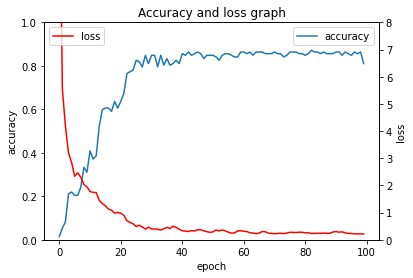

In [10]:

plt.xlabel('epoch')
plt.title("Accuracy and loss graph")



plt.plot(history.history['accuracy'])

plt.ylabel('accuracy')
plt.ylim([0,1])
plt.legend(['accuracy'],loc='upper right')
plt.twinx()

plt.plot(history.history['loss'],color='red')
plt.ylabel('loss')
plt.ylim([0,8])
plt.legend(['loss'],loc='upper left')




plt.show()

In [11]:
testing_data = testing_data.reshape(-1, 280, 280, 1)

model.evaluate(testing_data, testing_labels)

2/2 [==============================] - 0s 203ms/step - loss: 3.3538 - accuracy: 0.2292


[3.3537750244140625, 0.2291666716337204]